In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import seaborn as sns
from io import StringIO

In [5]:
data = '''
Radio,Newspaper,adv_ID,Actress,Sales,TV,Actor
37.8,69.2,1,No,22.1,230.1,No
39.3,45.1,2,Yes,10.4,44.5,Yes
45.9,69.3,3,No,12.0,17.2,No
41.3,58.5,4,No,16.5,151.5,No
10.8,58.4,5,No,17.9,180.8,No
48.9,75.0,6,No,7.2,8.7,No
32.8,23.5,7,No,11.8,57.5,No
19.6,11.6,8,Yes,13.2,120.2,Yes
2.1,1.0,9,No,4.8,8.6,No
2.6,21.2,10,Yes,15.6,199.8,Yes
5.8,24.2,11,No,12.6,66.1,No
24.0,4.0,12,No,17.4,214.7,No
35.1,65.9,13,Yes,9.2,23.8,Yes
7.6,7.2,14,No,13.7,97.5,No
32.9,46.0,15,No,19.0,204.1,No
47.7,52.9,16,Yes,22.4,195.4,Yes
36.6,114.0,17,Yes,12.5,67.8,Yes
39.6,55.8,18,No,24.4,281.4,No
20.5,18.3,19,No,11.3,69.2,No
23.9,19.1,20,Yes,14.6,147.3,Yes
27.7,53.4,21,Yes,18.0,218.4,Yes
5.1,23.5,22,Yes,17.5,237.4,Yes
15.9,49.6,23,No,5.6,13.2,No
16.9,26.2,24,No,20.5,228.3,No
12.6,18.3,25,Yes,9.7,62.3,Yes
3.5,19.5,26,No,17.0,262.9,No
29.3,12.6,27,No,15.0,142.9,No
16.7,22.9,28,No,20.9,240.1,No
27.1,22.9,29,No,18.9,248.8,No
16.0,40.8,30,No,10.5,70.6,No
28.3,43.2,31,No,21.4,292.9,No
17.4,38.6,32,Yes,11.9,112.9,Yes
1.5,30.0,33,No,13.2,97.2,No
20.0,0.3,34,Yes,17.4,265.6,Yes
1.4,7.4,35,Yes,11.9,95.7,Yes
4.1,8.5,36,No,17.8,290.7,No
43.8,5.0,37,No,25.4,266.9,No
49.4,45.7,38,No,14.7,74.7,No
26.7,35.1,39,No,10.1,43.1,No
37.7,32.0,40,Yes,21.5,228,Yes
22.3,31.6,41,Yes,16.6,202.5,Yes
33.4,38.7,42,Yes,17.1,177,Yes
27.7,1.8,43,No,20.7,293.6,No
8.4,26.4,44,Yes,17.9,206.9,Yes
25.7,43.3,45,No,8.5,25.1,No
22.5,31.5,46,Yes,16.1,175.1,Yes
9.9,35.7,47,Yes,10.6,89.7,Yes
41.5,18.5,48,No,23.2,239.9,No
15.8,49.9,49,No,19.8,227.2,No
11.7,36.8,50,Yes,9.7,66.9,Yes
3.1,34.6,51,No,16.4,199.8,No
9.6,3.6,52,No,10.7,100.4,No
41.7,39.6,53,No,22.6,216.4,No
46.2,58.7,54,Yes,21.2,182.6,Yes
28.8,15.9,55,Yes,20.2,262.7,Yes
49.4,60.0,56,No,23.7,198.9,No
28.1,41.4,57,No,999.0,7.3,No
19.2,16.6,58,No,13.2,136.2,No
49.6,37.7,59,Yes,23.8,210.8,Yes
29.5,9.3,60,No,18.4,210.7,No
2.0,21.4,61,No,8.1,53.5,No
42.7,54.7,62,No,24.2,261.3,No
15.5,27.3,63,No,20.7,239.3,No
29.6,8.4,64,Yes,14.0,102.7,Yes
42.8,28.9,65,No,16.0,131.1,No
9.3,0.9,66,Yes,11.3,69,Yes
24.6,2.2,67,No,11.0,31.5,No
14.5,10.2,68,No,13.4,139.3,No
27.5,11.0,69,Yes,18.9,237.4,Yes
43.9,27.2,70,Yes,22.3,216.8,Yes
30.6,38.7,71,Yes,18.3,199.1,Yes
14.3,31.7,72,Yes,12.4,109.8,Yes
33.0,19.3,73,Yes,8.8,26.8,Yes
5.7,31.3,74,Yes,11.0,129.4,Yes
24.6,13.1,75,Yes,17.0,213.4,Yes
43.7,89.4,76,No,8.7,16.9,No
1.6,20.7,77,No,6.9,27.5,No
28.5,14.2,78,Yes,14.2,120.5,Yes
29.9,9.4,79,No,5.3,5.4,No
7.7,23.1,80,No,11.0,116,No
26.7,22.3,81,Yes,11.8,76.4,Yes
4.1,36.9,82,Yes,17.3,239.8,Yes
20.3,32.5,83,Yes,11.3,75.3,Yes
44.5,35.6,84,No,13.6,68.4,No
43.0,33.8,85,Yes,21.7,213.5,Yes
18.4,65.7,86,Yes,20.2,193.2,Yes
27.5,16.0,87,Yes,12.0,76.3,Yes
40.6,63.2,88,Yes,16.0,110.7,Yes
25.5,73.4,89,Yes,12.9,88.3,Yes
47.8,51.4,90,Yes,16.7,109.8,Yes
4.9,9.3,91,Yes,14.0,134.3,Yes
1.5,33.0,92,No,7.3,28.6,No
33.5,59.0,93,Yes,19.4,217.7,Yes
36.5,72.3,94,Yes,22.2,250.9,Yes
14.0,10.9,95,No,11.5,107.4,No
31.6,52.9,96,Yes,16.9,163.3,Yes
3.5,5.9,97,No,16.7,197.6,No
21.0,22.0,98,No,20.5,184.9,No
42.3,51.2,99,Yes,25.4,289.7,Yes
41.7,45.9,100,Yes,17.2,135.2,Yes
4.3,49.8,101,Yes,16.7,222.4,Yes
36.3,100.9,102,Yes,23.8,296.4,Yes
10.1,21.4,103,No,19.8,280.2,No
17.2,17.9,104,No,19.7,187.9,No
34.3,5.3,105,Yes,20.7,238.2,Yes
46.4,59.0,106,No,15.0,137.9,No
11.0,29.7,107,No,7.2,25,No
0.3,23.2,108,Yes,12.0,90.4,Yes
0.4,25.6,109,Yes,5.3,13.1,Yes
26.9,5.5,110,No,19.8,255.4,No
8.2,56.5,111,No,18.4,225.8,No
38.0,23.2,112,No,21.8,241.7,No
15.4,2.4,113,Yes,17.1,175.7,Yes
20.6,10.7,114,Yes,20.9,209.6,Yes
46.8,34.5,115,No,14.6,78.2,No
35.0,52.7,116,No,12.6,75.1,No
14.3,25.6,117,No,12.2,139.2,No
0.8,14.8,118,Yes,9.4,76.4,Yes
36.9,79.2,119,No,15.9,125.7,No
16.0,22.3,120,Yes,6.6,19.4,Yes
26.8,46.2,121,No,15.5,141.3,No
21.7,50.4,122,Yes,7.0,18.8,Yes
2.4,15.6,123,Yes,16.6,224,Yes
34.6,12.4,124,Yes,15.2,123.1,Yes
32.3,74.2,125,No,19.7,229.5,No
11.8,25.9,126,Yes,10.6,87.2,Yes
38.9,50.6,127,No,6.6,7.8,No
0.0,9.2,128,Yes,11.9,80.2,Yes
49.0,3.2,129,Yes,24.7,220.3,Yes
12.0,43.1,130,Yes,9.7,59.6,Yes
39.6,8.7,131,Yes,1.6,0.7,Yes
2.9,43.0,132,Yes,17.7,265.2,Yes
27.2,2.1,133,Yes,5.7,8.4,Yes
33.5,45.1,134,No,19.6,219.8,No
38.6,65.6,135,Yes,10.8,36.9,Yes
47.0,8.5,136,Yes,11.6,48.3,Yes
39.0,9.3,137,No,9.5,25.6,No
28.9,59.7,138,No,20.8,273.7,No
25.9,20.5,139,Yes,9.6,43,Yes
43.9,1.7,140,Yes,20.7,184.9,Yes
17.0,12.9,141,No,10.9,73.4,No
35.4,75.6,142,Yes,19.2,193.7,Yes
33.2,37.9,143,Yes,20.1,220.5,Yes
5.7,34.4,144,No,10.4,104.6,No
14.8,38.9,145,Yes,12.3,96.2,Yes
1.9,9.0,146,Yes,10.3,140.3,Yes
7.3,8.7,147,No,18.2,240.1,No
49.0,44.3,148,No,25.4,243.2,No
40.3,11.9,149,No,10.9,38,No
25.8,20.6,150,No,10.1,44.7,No
13.9,37.0,151,No,16.1,280.7,No
8.4,48.7,152,Yes,11.6,121,Yes
23.3,14.2,153,Yes,16.6,197.6,Yes
39.7,37.7,154,No,16.0,171.3,No
21.1,9.5,155,No,20.6,187.8,No
11.6,5.7,156,No,3.2,4.1,No
43.5,50.5,157,Yes,15.3,93.9,Yes
1.3,24.3,158,Yes,10.1,149.8,Yes
36.9,45.2,159,No,7.3,11.7,No
18.4,34.6,160,Yes,12.9,131.7,Yes
18.1,30.7,161,No,16.4,172.5,No
35.8,49.3,162,No,13.3,85.7,No
18.1,25.6,163,No,19.9,188.4,No
36.8,7.4,164,No,18.0,163.5,No
14.7,5.4,165,Yes,11.9,117.2,Yes
3.4,84.8,166,Yes,16.9,234.5,Yes
37.6,21.6,167,Yes,8.0,17.9,Yes
5.2,19.4,168,No,17.2,206.8,No
23.6,57.6,169,No,17.1,215.4,No
10.6,6.4,170,Yes,20.0,284.3,Yes
11.6,18.4,171,No,8.4,50,No
20.9,47.4,172,No,17.5,164.5,No
20.1,17.0,173,Yes,7.6,19.6,Yes
7.1,12.8,174,Yes,16.7,168.4,Yes
3.4,13.1,175,No,16.5,222.4,No
48.9,41.8,176,No,27.0,276.9,No
30.2,20.3,177,Yes,20.2,248.4,Yes
7.8,35.2,178,Yes,16.7,170.2,Yes
2.3,23.7,179,Yes,16.8,276.7,Yes
10.0,17.6,180,Yes,17.6,165.6,Yes
2.6,8.3,181,Yes,15.5,156.6,Yes
5.4,27.4,182,Yes,17.2,218.5,Yes
5.7,29.7,183,Yes,8.7,56.2,Yes
43.0,71.8,184,No,26.2,287.6,No
21.3,30.0,185,Yes,17.6,253.8,Yes
45.1,19.6,186,Yes,22.6,205,Yes
2.1,26.6,187,No,10.3,139.5,No
28.7,18.2,188,No,17.3,191.1,No
13.9,3.7,189,No,20.9,286,No
12.1,23.4,190,No,6.7,18.7,No
41.1,5.8,191,Yes,10.8,39.5,Yes
10.8,6.0,192,Yes,11.9,75.5,Yes
4.1,31.6,193,Yes,5.9,17.2,Yes
42.0,3.6,194,No,19.6,166.8,No
35.6,6.0,195,Yes,17.3,149.7,Yes
3.7,13.8,196,No,7.6,38.2,No
4.9,8.1,197,No,14.0,94.2,No
9.3,6.4,198,No,14.8,177,No
42.0,66.2,199,No,25.5,283.6,No
8.6,8.7,200,No,18.4,232.1,No'''
data_io = StringIO(data)
df = pd.read_csv(data_io)
df

,Radio,Newspaper,adv_ID,Actress,Sales,TV,Actor
0,37.8,69.2,1,No,22.1,230.1,No
1,39.3,45.1,2,Yes,10.4,44.5,Yes
2,45.9,69.3,3,No,12.0,17.2,No
3,41.3,58.5,4,No,16.5,151.5,No
4,10.8,58.4,5,No,17.9,180.8,No
...,...,...,...,...,...,...,...
195,3.7,13.8,196,No,7.6,38.2,No
196,4.9,8.1,197,No,14.0,94.2,No
197,9.3,6.4,198,No,14.8,177.0,No
198,42.0,66.2,199,No,25.5,283.6,No


In [6]:
df = df.loc[df['Sales']<500]
df

,Radio,Newspaper,adv_ID,Actress,Sales,TV,Actor
0,37.8,69.2,1,No,22.1,230.1,No
1,39.3,45.1,2,Yes,10.4,44.5,Yes
2,45.9,69.3,3,No,12.0,17.2,No
3,41.3,58.5,4,No,16.5,151.5,No
4,10.8,58.4,5,No,17.9,180.8,No
...,...,...,...,...,...,...,...
195,3.7,13.8,196,No,7.6,38.2,No
196,4.9,8.1,197,No,14.0,94.2,No
197,9.3,6.4,198,No,14.8,177.0,No
198,42.0,66.2,199,No,25.5,283.6,No


<Axes: >

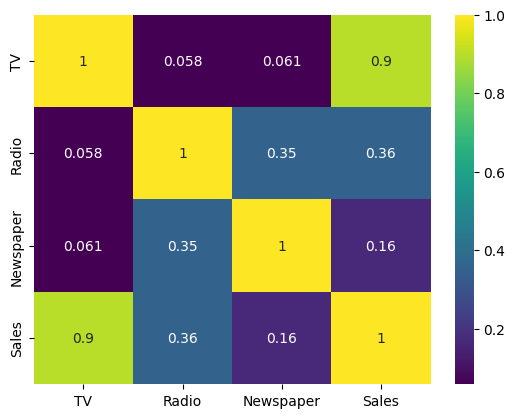

In [25]:
dati = df[['TV','Radio','Newspaper','Sales']]
sns.heatmap(dati.corr(), annot=True, cmap='viridis')

        TV  Radio  Newspaper  Sales
1     44.5   39.3       45.1   10.4
7    120.2   19.6       11.6   13.2
9    199.8    2.6       21.2   15.6
12    23.8   35.1       65.9    9.2
15   195.4   47.7       52.9   22.4
..     ...    ...        ...    ...
185  205.0   45.1       19.6   22.6
190   39.5   41.1        5.8   10.8
191   75.5   10.8        6.0   11.9
192   17.2    4.1       31.6    5.9
194  149.7   35.6        6.0   17.3

[99 rows x 4 columns]


<Axes: title={'center': "Correlazione solo tra le righe dove Actress == 'Yes'"}>

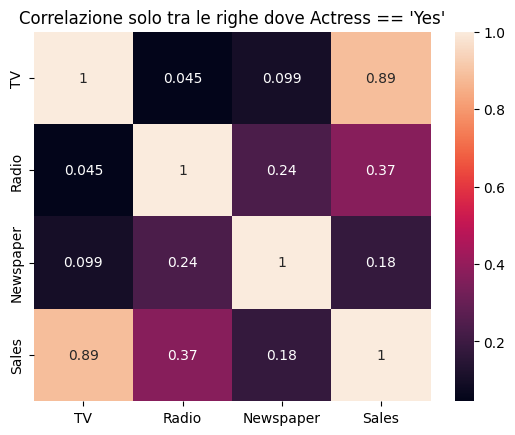

In [9]:
yesdonne = df[['TV','Radio','Newspaper', 'Sales']].loc[(df['Actress']== 'Yes')]
print(yesdonne)

plt.title("Correlazione solo tra le righe dove Actress == 'Yes'")
sns.heatmap(yesdonne.corr(), annot=True)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
5      8.7   48.9       75.0    7.2
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[100 rows x 4 columns]


<Axes: title={'center': "Correlazione solo tra le righe dove Actress == 'No'"}>

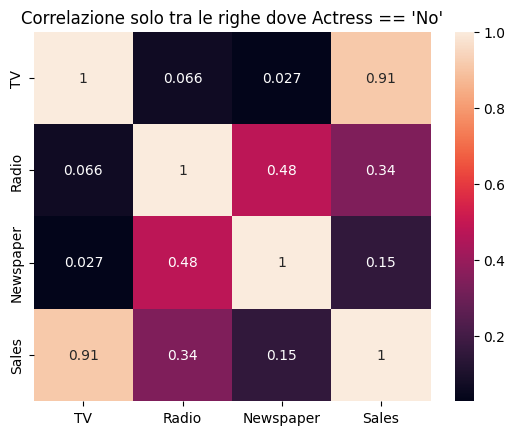

In [10]:
nodonne = df[['TV','Radio','Newspaper', 'Sales']].loc[(df['Actress']== 'No')]
print(nodonne)

plt.title("Correlazione solo tra le righe dove Actress == 'No'")
sns.heatmap(nodonne.corr(), annot=True)

        TV  Radio  Newspaper  Sales
1     44.5   39.3       45.1   10.4
7    120.2   19.6       11.6   13.2
9    199.8    2.6       21.2   15.6
12    23.8   35.1       65.9    9.2
15   195.4   47.7       52.9   22.4
..     ...    ...        ...    ...
185  205.0   45.1       19.6   22.6
190   39.5   41.1        5.8   10.8
191   75.5   10.8        6.0   11.9
192   17.2    4.1       31.6    5.9
194  149.7   35.6        6.0   17.3

[99 rows x 4 columns]


<Axes: title={'center': "Correlazione solo tra le righe dove Actor == 'Yes'"}>

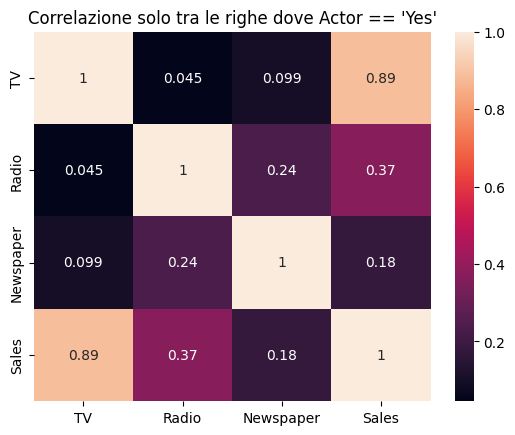

In [11]:
yesuomini = df[['TV','Radio','Newspaper', 'Sales']].loc[(df['Actor']== 'Yes')]
print(yesuomini)

plt.title("Correlazione solo tra le righe dove Actor == 'Yes'")
sns.heatmap(yesuomini.corr(), annot=True,)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
5      8.7   48.9       75.0    7.2
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[100 rows x 4 columns]


<Axes: title={'center': "Correlazione solo tra le righe dove Actor == 'No'"}>

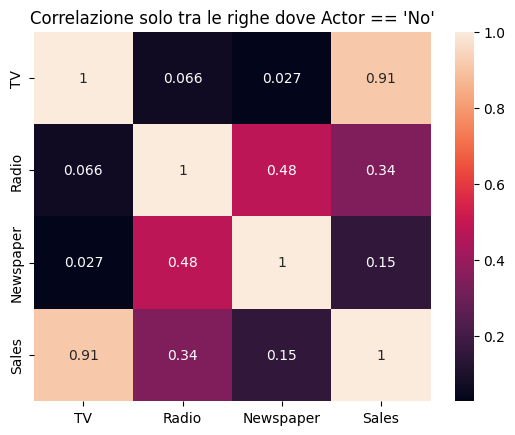

In [ ]:
nouomini = df[['TV','Radio','Newspaper', 'Sales']].loc[(df['Actor']== 'No')]
print(nouomini)

plt.title("Correlazione solo tra le righe dove Actor == 'No'")
sns.heatmap(nouomini.corr(), annot=True)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
5      8.7   48.9       75.0    7.2
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[100 rows x 4 columns]


<Axes: title={'center': "Correlazione solo tra le righe dove Actor AND Actress == 'No'"}>

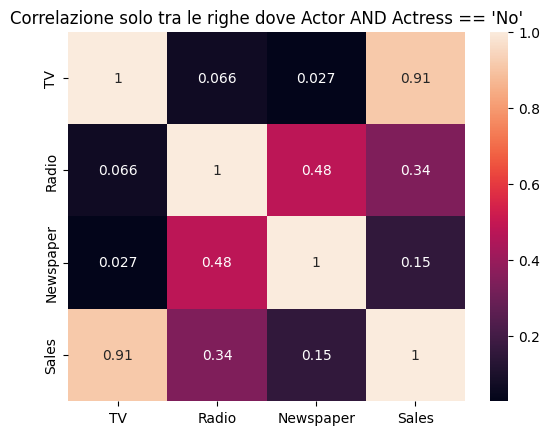

In [ ]:
nopersone = df[['TV','Radio','Newspaper', 'Sales']].loc[(df['Actor']== 'No') & (df['Actress']== 'No')]
print(nopersone)

plt.title("Correlazione solo tra le righe dove Actor AND Actress == 'No'")
sns.heatmap(nopersone.corr(), annot=True)

In [ ]:
ds = df.loc[(df['Actor']== 'No') & (df['Actress']== 'Yes')]
ds

,Radio,Newspaper,adv_ID,Actress,Sales,TV,Actor


In [ ]:
ds = df.loc[(df['Actor']== 'Yes') & (df['Actress']== 'No')]
ds

,Radio,Newspaper,adv_ID,Actress,Sales,TV,Actor


In [ ]:
ds1 = df.loc[(df['Actor']== 'Yes') & (df['Actress']== 'Yes')]
ds2 = df.loc[(df['Actor']== 'No') & (df['Actress']== 'No')]

In [ ]:
ds1

,Radio,Newspaper,adv_ID,Actress,Sales,TV,Actor
1,39.3,45.1,2,Yes,10.4,44.5,Yes
7,19.6,11.6,8,Yes,13.2,120.2,Yes
9,2.6,21.2,10,Yes,15.6,199.8,Yes
12,35.1,65.9,13,Yes,9.2,23.8,Yes
15,47.7,52.9,16,Yes,22.4,195.4,Yes
...,...,...,...,...,...,...,...
185,45.1,19.6,186,Yes,22.6,205.0,Yes
190,41.1,5.8,191,Yes,10.8,39.5,Yes
191,10.8,6.0,192,Yes,11.9,75.5,Yes
192,4.1,31.6,193,Yes,5.9,17.2,Yes


In [ ]:
ds2

,Radio,Newspaper,adv_ID,Actress,Sales,TV,Actor
0,37.8,69.2,1,No,22.1,230.1,No
2,45.9,69.3,3,No,12.0,17.2,No
3,41.3,58.5,4,No,16.5,151.5,No
4,10.8,58.4,5,No,17.9,180.8,No
5,48.9,75.0,6,No,7.2,8.7,No
...,...,...,...,...,...,...,...
195,3.7,13.8,196,No,7.6,38.2,No
196,4.9,8.1,197,No,14.0,94.2,No
197,9.3,6.4,198,No,14.8,177.0,No
198,42.0,66.2,199,No,25.5,283.6,No
